# Extra Statistics GZTAN dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold
from scipy.signal import butter, filtfilt
from scipy.fft import fft
import pywt
from PyEMD import EMD
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, GRU,SimpleRNN,LSTM
from tensorflow.keras import backend as K
from datasets import Dataset, load_dataset
import IPython.display as ipd
import librosa
from PIL import Image
import warnings
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import numpy as np
from scipy.stats import friedmanchisquare
import numpy as np
import scikit_posthocs as sp
import pandas as pd
import numpy as np
import scikit_posthocs as sp
warnings.filterwarnings("ignore")

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU is available and will be used.")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found or TensorFlow cannot access the GPU. Using CPU instead.")

GPU is available and will be used.


In [4]:
dataset = load_dataset("marsyas/gtzan", trust_remote_code=True)
train_dataset = dataset["train"]
id2label = train_dataset.features["genre"].int2str

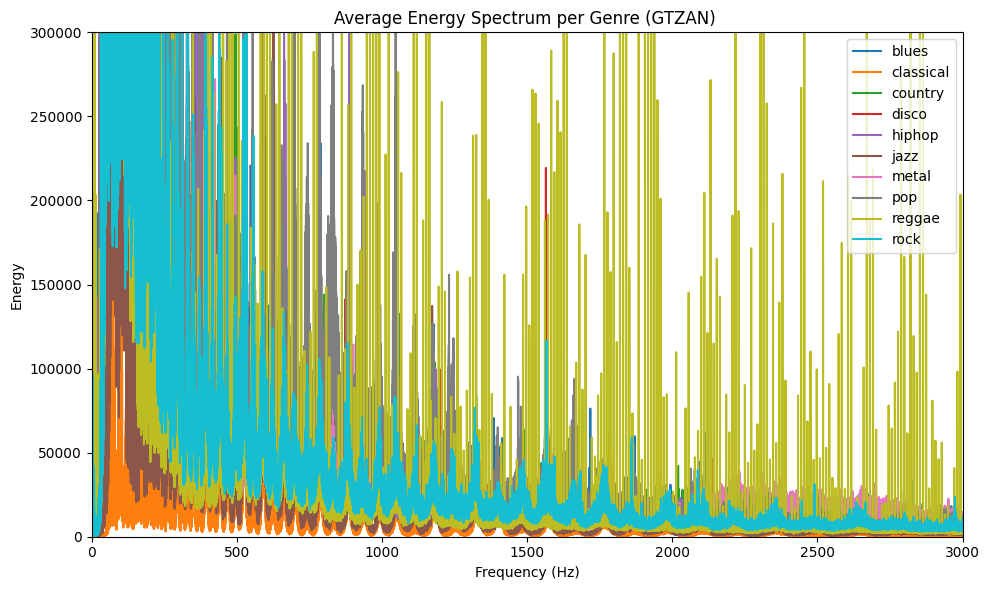

In [5]:
dataset = load_dataset("marsyas/gtzan", split="train", trust_remote_code=True)
id2genre = {
    0: "blues",
    1: "classical",
    2: "country",
    3: "disco",
    4: "hiphop",
    5: "jazz",
    6: "metal",
    7: "pop",
    8: "reggae",
    9: "rock"
}
SNIPPET_SECONDS = 30
sr = dataset[0]["audio"]["sampling_rate"]
snippet_samples = sr * SNIPPET_SECONDS
genre_sums = {}
genre_counts = {}
for example in dataset:
    genre_id = example["genre"]
    genre_name = id2genre[genre_id]
    audio_array = example["audio"]["array"] 
    if len(audio_array) > snippet_samples:
        audio_array = audio_array[:snippet_samples]
    elif len(audio_array) < snippet_samples:
        pad_length = snippet_samples - len(audio_array)
        audio_array = np.pad(audio_array, (0, pad_length), mode='constant')
    spectrum = np.fft.rfft(audio_array)
    magnitude = np.abs(spectrum)**2  
    if genre_name not in genre_sums:
        genre_sums[genre_name] = np.zeros_like(magnitude, dtype=np.float64)
        genre_counts[genre_name] = 0
    genre_sums[genre_name] += magnitude
    genre_counts[genre_name] += 1
genres_sorted = sorted(genre_sums.keys())  
genre_averages = {}
for g in genres_sorted:
    genre_averages[g] = genre_sums[g] / genre_counts[g]
freq = np.fft.rfftfreq(snippet_samples, 1.0 / sr)
plt.figure(figsize=(10, 6))
for g in genres_sorted:
    plt.plot(freq, genre_averages[g], label=g)
plt.title(f"Average Energy Spectrum per Genre (GTZAN) ")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Energy")
plt.legend(loc="upper right")
plt.xlim([0, 3000])
plt.ylim([0, 300000])
plt.tight_layout()
plt.show()

In [6]:
run1 = {'raw': 0.2068659951289495,
  'emd': 0.2142093787590663,
  'wavelet': 0.24493467013041176,
  'fourier': 0.3013165811697642,
  'ALL': 0.2699463983376821,
  'mel': 0.5335577885309855}

In [7]:
run2 = {'raw': 0.20623115599155425,
  'emd': 0.20821608106295267,
  'wavelet': 0.24827302893002826,
  'fourier': 0.2883450557788213,
  'ALL': 0.25591792066891983,
  'mel': 0.5262328346570333}

In [8]:
run3 = {'raw': 0.201201002796491,
  'emd': 0.21188944776852928,
  'wavelet': 0.25891289710998533,
  'fourier': 0.2936264634132385,
  'ALL': 0.2659179210662842,
  'mel': 0.559886093934377}

In [9]:
run4 = {'raw': 0.20319932897885637,
  'emd': 0.22055778900782266,
  'wavelet': 0.2659011691808701,
  'fourier': 0.3053165853023529,
  'ALL': 0.24956783652305603,
  'mel': 0.5438576261202495}

In [10]:
run5 = {'raw': 0.20417755345503488,
  'emd': 0.20714740256468459,
  'wavelet': 0.26088274617989854,
  'fourier': 0.2886231144269307,
  'ALL': 0.2592278083165486,
  'mel': 0.5068509221076966}

In [11]:
run6 = {'raw': 0.1955427139997482,
  'emd': 0.21018760204315184,
  'wavelet': 0.24460971355438232,
  'fourier': 0.2916432102521261,
  'ALL': 0.25792294740676874,
  'mel': 0.5178626517454783}

In [12]:
run7 = {'raw': 0.20255276560783386,
  'emd': 0.21424120763937632,
  'wavelet': 0.24758458832899727,
  'fourier': 0.2936147431532542,
  'ALL': 0.2536013384660085,
  'mel': 0.5412043591340383}

In [13]:
run8 = {'raw': 0.21291122237841292,
  'emd': 0.20489614804585776,
  'wavelet': 0.23890284597873687,
  'fourier': 0.27928643027941386,
  'ALL': 0.258611390988032,
  'mel': 0.5215159078439077}

In [14]:
run9 = {'raw': 0.19719597995281218,
  'emd': 0.21823450426260632,
  'wavelet': 0.25225125551223754,
  'fourier': 0.2956398646036784,
  'ALL': 0.27099329829216,
  'mel': 0.5138659973939259}

In [15]:
run10 = {'raw': 0.2092160771290461,
  'emd': 0.20420937836170197,
  'wavelet': 0.24822948078314466,
  'fourier': 0.29365158875783287,
  'ALL': 0.24360636572043104,
  'mel': 0.5315443893273671}

In [16]:
all_runs = [run1,run2,run3,run4,run5,run6,run7,run8,run9,run10]

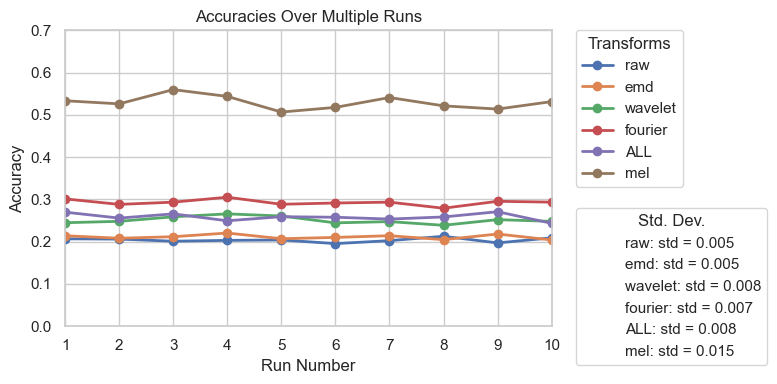

In [17]:


def plot_run_accuracies_with_std(runs):
    sns.set_theme(style="whitegrid")
    if not runs:
        print("No data provided.")
        return
    transforms = list(runs[0].keys())
    x_values = range(1, len(runs) + 1)
    fig, ax = plt.subplots(figsize=(8, 4))
    transform_std = {}
    for transform in transforms:
        y_values = [run[transform] for run in runs]
        ax.plot(x_values, y_values, marker='o', linewidth=2, label=transform)
        transform_std[transform] = np.std(y_values)

    ax.set_xticks(x_values)  
    ax.set_xlim([1, len(runs)])  
    ax.set_title("Accuracies Over Multiple Runs")
    ax.set_xlabel("Run Number")
    ax.set_ylabel("Accuracy")
    ax.set_ylim([0,0.7])  
    main_legend = ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), 
                            borderaxespad=0., title="Transforms")
    ax.add_artist(main_legend)

    std_legend_elements = []
    for transform in transforms:
        std_val = transform_std[transform]
     
        dummy_line = mlines.Line2D([], [], linestyle='none', marker='',
                                   label=f"{transform}: std = {std_val:.3f}")
        std_legend_elements.append(dummy_line)

    std_legend = ax.legend(handles=std_legend_elements,
                           loc='upper left',
                           bbox_to_anchor=(1.05, 0.4), 
                           borderaxespad=0.,
                           title="Std. Dev.")
    
    plt.tight_layout()
    plt.show()


plot_run_accuracies_with_std(all_runs)


In [18]:
raw_folds1 = [0.2133,0.2100,0.2200,0.1917,0.1993]
emd_folds1 = [0.1950,0.2267,0.2633,0.1767,0.2094]
waveletfolds1=[0.2433,0.2433,0.2317,0.2383,0.2680]
fourierfolds1 = [0.3067,0.3117,0.2850,0.2867,0.3166]
allfolds1 = [0.2700,0.2450,0.2917,0.2633,0.2797]
melfolds1 =[0.4967,0.5267,0.5717,0.5150,0.5578]

In [19]:
raw_folds2 = [0.2000,0.1933,0.1950,0.2117,0.2312]
emd_folds2 = [0.1833,0.2267,0.2233,0.1917,0.2161]
waveletfolds2=[0.2233,0.2517,0.2317,0.2617,0.2730]
fourierfolds2 = [0.2917,0.2633,0.2450,0.2967,0.3451]
allfolds2 = [0.2467,0.2567,0.2550,0.2700,0.2513]
melfolds2 =[0.5367,0.4517,0.5233,0.5533,0.5662]

In [20]:
raw_folds3 = [0.2317,0.1883,0.2117,0.1733,0.2010]
emd_folds3 = [0.1900,0.2267,0.1950,0.2250,0.2228]
waveletfolds3 = [0.3117,0.2467,0.2517,0.2383,0.2462]
fourierfolds3 = [0.3067,0.2983,0.2967,0.2733,0.2931]
allfolds3 =  [0.2800,0.2783,0.2583,0.2617,0.2513] 
melfolds3 = [0.5633,0.5500,0.5500,0.5833,0.5528]

In [21]:
raw_folds4 = [0.1983,0.1967,0.2067,0.2150,0.1993]
emd_folds4 = [0.1817,0.2283,0.2383,0.2300,0.2245]
waveletfolds4 = [0.2483,0.2800,0.2817,0.2850,0.2345]
fourierfolds4 = [0.2817,0.3133,0.3383,0.2767,0.3166]
allfolds4 =  [0.2250,0.2700,0.2883,0.2300,0.2345]
melfolds4 = [0.5267,0.5983,0.4950,0.5750,0.5243]

In [22]:
raw_folds5 = [0.2150,0.2067,0.2267,0.1950,0.1776]
emd_folds5 = [0.2333,0.2000,0.2133,0.2417,0.1474]
waveletfolds5 = [0.2883,0.2767,0.2667,0.2567,0.2161]
fourierfolds5 = [0.3117,0.2883,0.2933,0.2600,0.2898]
allfolds5 = [0.2933,0.2667,0.2717,0.2367,0.2278]
melfolds5 = [0.4650,0.5200,0.5133,0.5183,0.5176]

In [23]:
raw_folds6 = [0.1917,0.1800,0.1800,0.2167,0.2094]
emd_folds6 = [0.2050,0.2383,0.2067,0.2133,0.1876]
waveletfolds6 = [0.2283,0.2133,0.2300,0.2750,0.2764] 
fourierfolds6 =  [0.2833,0.2867,0.3000,0.2783,0.3099]
allfolds6 = [0.2300,0.2517,0.2767,0.2750,0.2563]
melfolds6 =  [0.5183,0.5533,0.5017,0.4867,0.5293]

In [24]:
raw_folds7 = [0.1683,0.1917,0.2233,0.2100,0.2194]
emd_folds7 = [0.1967,0.1800,0.2367,0.2167,0.2412]
waveletfolds7 = [0.2367,0.2250,0.2717,0.2533,0.2513] 
fourierfolds7 =  [0.3083,0.2983,0.3000,0.2800,0.2814]
allfolds7 = [0.2517,0.2383,0.2467,0.2633,0.2680]
melfolds7 =  [0.5367,0.5133,0.5567,0.5617,0.5377]

In [25]:
raw_folds8 = [0.2217,0.1883,0.1700,0.2400,0.2446]
emd_folds8 = [0.1917,0.1817,0.1883,0.2333,0.2295]
waveletfolds8 = [0.2467,0.2200,0.2450,0.2467,0.2362]
fourierfolds8 =  [0.2550,0.2967,0.2900,0.2683,0.2864]
allfolds8 = [0.2433,0.2483,0.2517,0.2717,0.2781]
melfolds8 =  [0.5017,0.5467,0.5333,0.5100,0.5159]

In [26]:
raw_folds9 = [0.1833,0.2217,0.2117,0.1733,0.1960]
emd_folds9 = [0.1967,0.2417,0.2183,0.2000,0.2345]
waveletfolds9 = [0.2450,0.2567,0.2683,0.2400,0.2513]
fourierfolds9 = [0.2617,0.3000,0.3133,0.2967,0.3065]
allfolds9 = [0.2517,0.2717,0.2717,0.2333,0.3266]
melfolds9 =  [0.5133,0.4950,0.5167,0.5117,0.5327]

In [27]:
raw_folds10 = [0.1917,0.2183,0.2050,0.2150,0.2161]
emd_folds10 = [0.1750,0.2317,0.2050,0.2000,0.2094]
waveletfolds10 = [0.2333,0.2700,0.2533,0.2550,0.2295]
fourierfolds10 = [0.2633,0.2750,0.3167,0.2950,0.3183]
allfolds10 = [0.2017,0.2817,0.2383,0.2233,0.2730]
melfolds10 =  [0.5200,0.5600,0.4650,0.5683,0.5444]

In [28]:
raw = raw_folds1+raw_folds2+raw_folds3+raw_folds4+raw_folds5+raw_folds6+raw_folds7+raw_folds8+raw_folds9+raw_folds10

In [29]:
emd = emd_folds1+emd_folds2+emd_folds3+emd_folds4+emd_folds5+emd_folds6+emd_folds7+emd_folds8+emd_folds9+emd_folds10

In [30]:
wavelet = waveletfolds1+waveletfolds2+waveletfolds3+waveletfolds4+waveletfolds5+waveletfolds6+waveletfolds7+waveletfolds8+waveletfolds9+waveletfolds10

In [31]:
fourier = fourierfolds1+fourierfolds2+fourierfolds3+fourierfolds4+fourierfolds5+fourierfolds6+fourierfolds7+fourierfolds8+fourierfolds9+fourierfolds10

In [32]:
allfolds = allfolds1+allfolds2+allfolds3+allfolds4+allfolds5+allfolds6+allfolds7+allfolds8+allfolds9+allfolds10

In [33]:
melfolds = melfolds1+melfolds2+melfolds3+melfolds4+melfolds5+melfolds6+melfolds7+melfolds8+melfolds9+melfolds10

In [34]:
def friedman_test(acc_raw, acc_wavelet, acc_mel, acc_emd, acc_fourier,all_folds_):
    stat, p = friedmanchisquare(acc_raw, acc_wavelet, acc_mel, acc_emd, acc_fourier,all_folds_)
    return stat, p




stat, p = friedman_test(raw, wavelet, melfolds, emd, fourier,allfolds)
print("Friedman statistic:", stat)
print("p-value:", p)

Friedman statistic: 227.41981672394053
p-value: 3.821129896764025e-47


In [35]:

arr = np.column_stack([
raw,emd, wavelet,fourier,allfolds ,melfolds,
])

posthoc_results = sp.posthoc_nemenyi_friedman(arr)
print(posthoc_results)


       0      1         2         3         4         5
0  1.000  0.900  0.001000  0.001000  0.001000  0.001000
1  0.900  1.000  0.001000  0.001000  0.001000  0.001000
2  0.001  0.001  1.000000  0.001000  0.752604  0.001000
3  0.001  0.001  0.001000  1.000000  0.041739  0.028012
4  0.001  0.001  0.752604  0.041739  1.000000  0.001000
5  0.001  0.001  0.001000  0.028012  0.001000  1.000000


In [36]:
posthoc_results.to_excel("Y:\\Data Science Readings\\Introduction to signal processing\\Final Paper\\posthoc.xlsx")